In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from scipy.optimize import curve_fit

In [2]:
def euclidDist(x1, y1, x2, y2):
    return np.sqrt(np.square(x2-x1) + np.square(y2-y1))

def transformX(xy, alpha, beta, gamma, theta, phi, psi, z):
    xout = gamma*(xy[:,0]*np.cos(theta) - xy[:,1]*np.sin(theta) + alpha)
    xout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
#    xout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*xout
    return xout

def transformY(xy, alpha, beta, gamma, theta, phi, psi, z):
    yout = gamma*(xy[:,0]*np.sin(theta) + xy[:,1]*np.cos(theta) + beta)
    yout = 1./z*np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
#    yout = z/np.sqrt((z+xy[:,0]*np.sin(phi))*(z+xy[:,1]*np.sin(psi)))*yout
    return yout

In [74]:
dataRaw = pd.read_csv('calibDataOutput_VincentLeftRight_CenteredHead_onlySync.txt')

print('raw data samples: ',len(dataRaw))
data = dataRaw[5:]

# Keep only sync data
data = data[data.quality == 8 ]
print('sync data samples: ',len(data))

raw data samples:  1194
sync data samples:  383


<IPython.core.display.Javascript object>


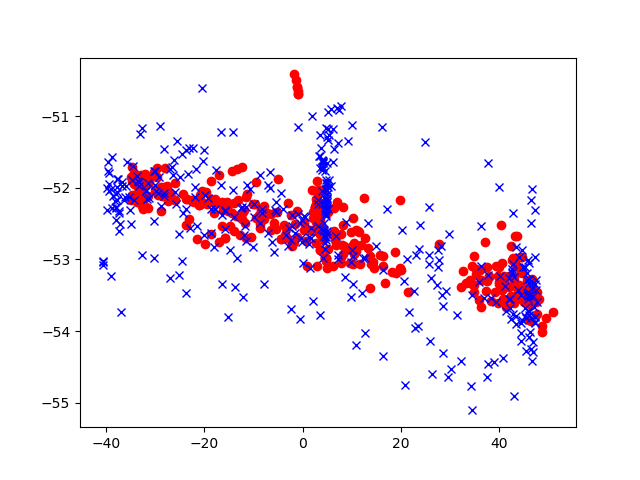

In [75]:
# Plot the data
%matplotlib notebook
plt.plot(data['outputApplyX'], data['outputApplyY'],'ro')
plt.plot(data['targetX'], data['targetY'], 'bx')
plt.show()

In [76]:
xtmp = data['outputEvalNopolX'].values.reshape(data['outputEvalNopolX'].values.shape[0],1)
ytmp = data['outputEvalNopolY'].values.reshape(data['outputEvalNopolY'].values.shape[0],1)
xy = np.concatenate((xtmp, ytmp), axis=1)

Xtarget = data['targetX']
Ytarget = data['targetY']

In [29]:
# Add a shift in the data between input and target values
shift = 7
xy = xy[shift:]
Xtarget = Xtarget[:-shift]
Ytarget = Ytarget[:-shift]

In [ ]:
# Add a shift in the data between input and target values
#shift = 1
#xy = xy[:-shift]
#Xtarget = Xtarget[shift:]
#Ytarget = Ytarget[shift:]

In [ ]:
init_vals = [0, 0, 1, 0, 0, 0, 300]
best_valsTotY, covar = curve_fit(transformY, xy, Ytarget, p0=init_vals)
print("coefs after fit on Y:", best_valsTotY)

init_vals = [0, 0, 1, 0, 0, 0, 100]
best_valsTotX, covar = curve_fit(transformX, xy, Xtarget, p0=init_vals)
print("coefs after fit on X:", best_valsTotX)

MSEx = np.mean(np.square(transformX(xy, *best_valsTotX)-Xtarget))
MSEy = np.mean(np.square(transformY(xy, *best_valsTotY)-Ytarget))

MSEpolyx = np.mean(np.square(data['outputEvalX']-Xtarget))
MSEpolyy = np.mean(np.square(data['outputEvalY']-Ytarget))

print('MSE on X rigig transfo fit: ', MSEx)
print('MSE on X poly fit: ', MSEpolyx)

print('MSE on y rigig transfo fit: ', MSEy)
print('MSE on y poly fit: ', MSEpolyy)

meanDistRigid = np.mean(euclidDist(Xtarget, Ytarget, transformX(xy, *best_valsTotX), transformY(xy, *best_valsTotY)))
meanDistPoly = np.mean(euclidDist(Xtarget, Ytarget, data['outputEvalX'], data['outputEvalY']))

print('mean distance rigid fit: ',meanDistRigid)
print('mean distance poly fit: ',meanDistPoly)

%matplotlib notebook
plt.plot(transformX(xy, *best_valsTotX), transformY(xy, *best_valsTotY), 'ro')
#plt.plot(data['outputApplyX'], data['outputApplyY'],'y+')
plt.plot(data['targetX'], data['targetY'],'bx')
plt.show()

<IPython.core.display.Javascript object>


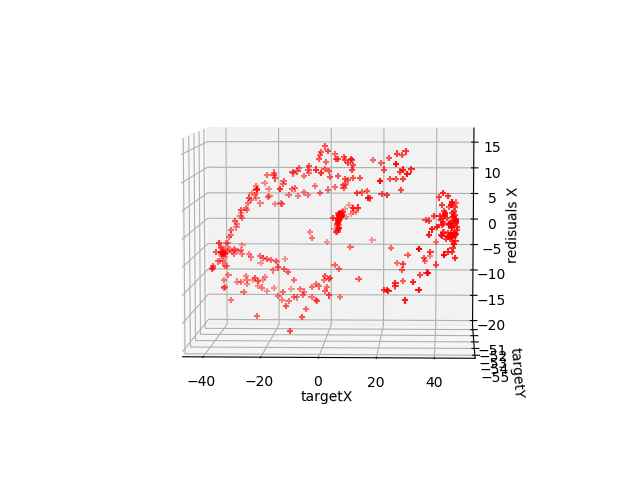

Text(0.5,0,'redisuals X')

In [77]:
# Plot the residuals for rigid fit

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#residualsX = Xtarget - transformX(xy, *best_valsTotX)
residualsX = data['targetX'] - data['outputApplyX']
#residualsX = Xtarget - xy[:,0]


ax.scatter(Xtarget, Ytarget, residualsX, c='r', marker='+')
ax.set_xlabel('targetX')
ax.set_ylabel('targetY')
ax.set_zlabel('redisuals X')

<IPython.core.display.Javascript object>


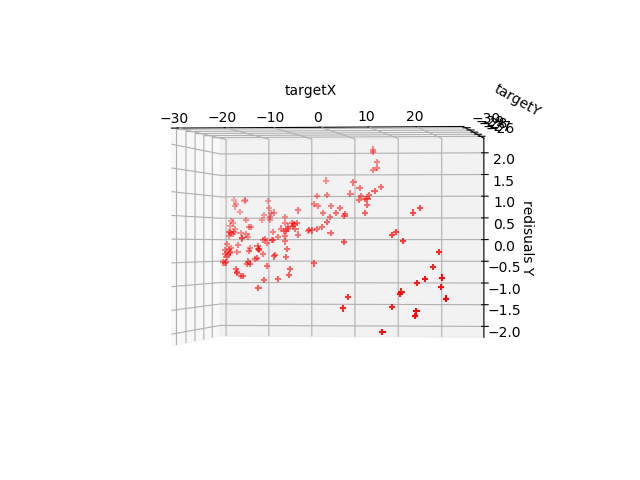

Text(0.5,0,'redisuals Y')

In [73]:
# Plot the residuals for rigid fit

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#residualsY = Ytarget - transformY(xy, *best_valsTotY)
residualsY = Ytarget - data['outputApplyY']

ax.scatter(Xtarget, Ytarget, residualsY, c='r', marker='+')
ax.set_xlabel('targetX')
ax.set_ylabel('targetY')
ax.set_zlabel('redisuals Y')